In [61]:
import jax.numpy as jnp

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Full Kernel

In [ ]:
def plot_data(full):
    dp_1 = jnp.arange(1,50)*10
    dp_2 = jnp.arange(500, 1001, 100)
    dp_3 = jnp.arange(1200, 3000, 200)

    if full:
        t_1 = jnp.load("./data/full_time_10_500_10.npy")
        t_2 = jnp.load("./data/full_time_500_1001_100.npy")
        t_3 = jnp.load("./data/full_time_1200_3000_200.npy")
    else:
        t_1 = jnp.load("./data/sparse_time_10_500_10.npy")
        t_2 = jnp.load("./data/sparse_time_500_1001_100.npy")
        t_3 = jnp.load("./data/sparse_time_1200_3000_200.npy")

    dp = jnp.hstack((dp_1, dp_2, dp_3))
    t = jnp.hstack((t_1, t_2, t_3))

    return dp, t

In [62]:
order = 3

In [63]:
dp_full, t_full = plot_data(True)

lm = LinearRegression()
lm.fit(dp_full.reshape(-1,1), t_full**(1/order))
line_full = lm.predict(dp_full.reshape(-1,1))

print(lm.score(dp_full.reshape(-1,1), t_full**(1/order)))

0.9822944459057968


In [ ]:
dp_sparse, t_sparse = plot_data(True)

lm = LinearRegression()
lm.fit(dp_sparse.reshape(-1,1), t_sparse**(1/order))
line_sparse = lm.predict(dp_sparse.reshape(-1,1))

print(lm.score(dp_sparse.reshape(-1,1), t_sparse**(1/order)))

Text(0, 0.5, 'average inversion time')

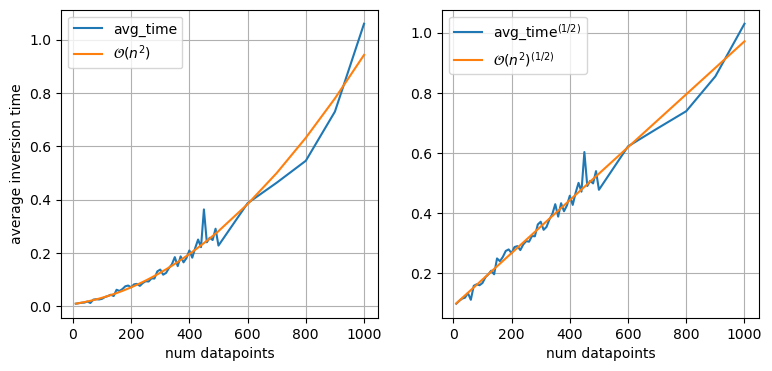

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

ax[0].plot(dp_full,t_full, label="avg_time")
ax[0].plot(dp_full, line_full**order, label="$\mathcal{O}(n^"+f"{order})$")
ax[0].plot(dp_sparse,t_sparse, label="avg_time")
ax[0].plot(dp_sparse, line_sparse**order, label="$\mathcal{O}(n^"+f"{order})$")

ax[1].plot(dp_full,t_full**(1/order), label="avg_time$^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_full, line_full, label="$\mathcal{O}(n^"+f"{order})"+"^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_sparse,t_sparse**(1/order), label="avg_time$^{(1/"+f"{order}"+")}$")
ax[1].plot(dp_sparse, line_sparse, label="$\mathcal{O}(n^"+f"{order})"+"^{(1/"+f"{order}"+")}$")

for i in range(2):
    ax[i].grid()
    ax[i].set_xlabel("num datapoints")
    ax[i].legend()

ax[0].set_ylabel("average inversion time")